In [2]:
import numpy as np
from modules import bayesian
from modules import cubicharmonics
import matplotlib.pyplot as plt
import copy


In [25]:
#Carico i dati in data e li ordino in sdata e grid

data=np.transpose(np.loadtxt('/scratch/endrigo/spce/dump05fs/nlttkcepstral.out'))

sdata, grid = bayesian.generatesorteddata(data, 100)

[0. 0. 1.] [0. 1. 0.] [1. 0. 0.]


In [26]:
#Medio i dati su tutti i punti equivalenti per simmetria cubica e 
#ritorno la lista dei nuovi dati 'simmetrizzati' in gplot e sd
C=bayesian.cubicarray(list(grid), True)
dic, dics=bayesian.datadicG(data[1], data[2],cubicharmonics.Gvecgenerateall(100)[1:])
gplot, dataplot1, datasigmaplot1=bayesian.datiplot(C, dic, dics)
#gplot=grid
#dataplot1=sdata[0]
#datasigmaplot1=sdata[1]
dataplot=dataplot1
datasigmaplot=datasigmaplot1
sd=np.array([dataplot, datasigmaplot])


numero di elementi:  99
numero cicli teornicamente necessari 14701
numero cicli compiuti 66
numero di elementi non equivalenti per simmetria cubica:  33


In [27]:
#Calcolo il fit bayesiano con glot e sd come test
N=30
mN, SN, y_infer, sy_infer, conta=\
bayesian.bayesianpol(gplot, sd, 8, N, 0.01, gplot,bethapar=10000, ifprint= True, ifwarning= True, nLbp=0)

parametri ottimali [   0.88257704  -23.87869264  138.03463398 -452.76982578  777.51282129
 -511.11902293 -284.87664012  429.27153796]
numero di armoniche cubiche 8
valore a kmin inferito 0.7722244649775779 bias 0.88257704477651 dato a kmin 0.8856690628278414
determinante matrice delle armoniche cubiche ridotte: 5.5881416269323154e+20


<ErrorbarContainer object of 3 artists>

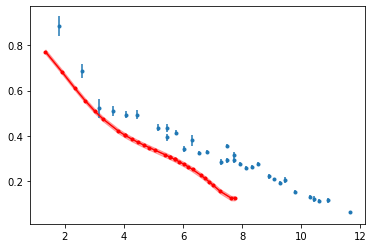

In [28]:
#Plotto il fit e i dati (gplot e sd)
%matplotlib inline
plt.fill_between(np.linalg.norm(gplot[:N], axis=1)*0.13484487571168569*10, y_infer+np.sqrt(sy_infer),y_infer-np.sqrt(sy_infer),  alpha=0.3, color='red')
plt.plot(np.linalg.norm(gplot[:N], axis=1)*0.13484487571168569*10, y_infer, '.-', color='red')
plt.errorbar(np.linalg.norm(gplot, axis=1)*0.13484487571168569*10*0.13484487571168569*10, dataplot,datasigmaplot, fmt='.')

parametri ottimali [  0.78748721 -14.04518155  44.2416421  -53.41237994 -11.5208496
  21.4889335   26.90541357  17.18983794   3.69518338  -7.7365179
 -15.25066044 -19.02531995 -19.97762679 -19.10442056]
numero di armoniche cubiche 14
valore a kmin inferito 0.7194796984989512 bias 0.7874872146627228 dato a kmin 0.8856690628278414
determinante matrice delle armoniche cubiche ridotte: 2.335872002482046e-72
grado ottimale 28 grado massimo tentato 28
numero di polinomi nella base ottimale:  14 numero di dati 33
best alpha 0.0007497749701194155
best betha 1


<ErrorbarContainer object of 3 artists>

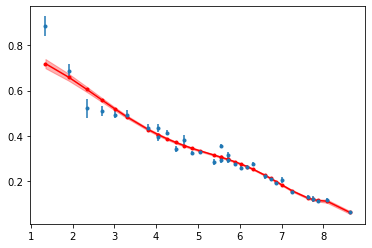

In [36]:
#Calcolo il best fit su gplot e sd con 50 dati
N=33
mN, SN, y_infer, sy_infer, spar, log_evidence_vP=\
bayesian.bestfit(gplot, sd, N, gplot, ifbetha=False, ifprintbestfit= False, ifprintfinal= True, nLbf=0)
#Plotto il best fit e i dati (gplot e sd)



%matplotlib inline

plt.fill_between(np.linalg.norm(gplot[:N], axis=1)*0.13484487571168569*10, y_infer+np.sqrt(sy_infer-1), y_infer-np.sqrt(sy_infer-1),  alpha=0.3, color='red')
plt.plot(np.linalg.norm(gplot[:N], axis=1)*0.13484487571168569*10, y_infer, '.-', color='red')
plt.errorbar(np.linalg.norm(gplot, axis=1)*0.13484487571168569*10, dataplot,datasigmaplot, fmt='.')

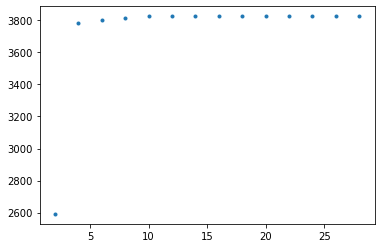

In [30]:
#Plotto la funzione di evidence che ho massimizzato per il best fit nella cella precedente
%matplotlib inline
plt.plot(range(2,(len(log_evidence_vP)+1)*2, 2), log_evidence_vP, '.')

In [31]:
#Calcolo il best fit includendo sempre piu' punti 
predbl=[]
spredbl=[]
Npointsbl=[]
N_max=33
N_iter=1
N_min=5
for i in range(1):
    predb=[]
    spredb=[]
    Npointsb=[]
    for N in range(N_min, N_max, N_iter):
        
        mN, SN, y_infer, sy_infer, spar, log_evidence_vP=\
        bayesian.bestfit(gplot, sd, N, gplot, ifbetha=False, ifprintbestfit=False, ifprintfinal=False, nLbf=i)
        Npointsb.append(np.linalg.norm(gplot[N]))
        if (N-N_min)%(((N_max-N_min))//5)==0: print(int((N-N_min)/((N_max-N_min))*100), '%')
        predb.append(mN[0])
        spredb.append(SN[0,0])
    predbl.append(predb)
    spredbl.append(spredb)
    Npointsbl.append(Npointsb)

0 %
17 %
35 %
53 %
71 %
89 %


In [32]:
sd[:, 2:], gplot.shape

(array([[0.52159203, 0.50992803, 0.49410147, 0.49381692, 0.43722107,
         0.43509171, 0.39384238, 0.41460944, 0.34092804, 0.38086237,
         0.32515475, 0.32904962, 0.28336956, 0.29190752, 0.35544015,
         0.31697678, 0.29386545, 0.27618724, 0.25989694, 0.26416362,
         0.27469284, 0.22147018, 0.20775278, 0.19341791, 0.20465389,
         0.15408687, 0.1292387 , 0.12135417, 0.11265392, 0.11613559,
         0.06185537],
        [0.04316543, 0.02235059, 0.01432095, 0.01965304, 0.01642175,
         0.01601094, 0.01535826, 0.01008017, 0.01397759, 0.02507263,
         0.01031274, 0.00924384, 0.01377054, 0.00988876, 0.01057999,
         0.0106409 , 0.01227314, 0.01006263, 0.00888309, 0.00849204,
         0.00966774, 0.01081558, 0.00790855, 0.00736499, 0.01399713,
         0.00600494, 0.00919327, 0.01131018, 0.00681554, 0.01060584,
         0.00640981]]),
 (33, 3))

In [33]:
#Calcolo il best fit includendo sempre piu' punti 
predbl=[]
spredbl=[]
Npointsbl=[]
N_max=33
N_iter=1
N_min=5
for i in range(N_min):
    predb=[]
    spredb=[]
    Npointsb=[]
    for N in range(i, N_max, N_iter):
        
        mN, SN, y_infer, sy_infer, spar, log_evidence_vP=\
        bayesian.bestfit(gplot[i:,:], sd[:, i:], N-i+1, gplot[i:, :], ifbetha=False, ifprintbestfit=False, ifprintfinal=False, nLbf=0)
        Npointsb.append(np.linalg.norm(gplot[N]))
        if (N-N_min)%(((N_max-N_min))//5)==0: print(int((N-N_min)/((N_max-N_min))*100), '%')
        predb.append(mN[0])
        spredb.append(SN[0,0])
    predbl.append(predb)
    spredbl.append(spredb)
    Npointsbl.append(Npointsb)

-17 %
0 %
17 %
35 %
53 %
71 %
89 %
0 %
17 %
35 %
53 %
71 %
89 %
0 %
17 %
35 %
53 %
71 %
89 %
0 %
17 %
35 %
53 %
71 %
89 %
0 %
17 %
35 %
53 %
71 %
89 %


Text(0.5, 0, 'k ($nm^{-1}$)')

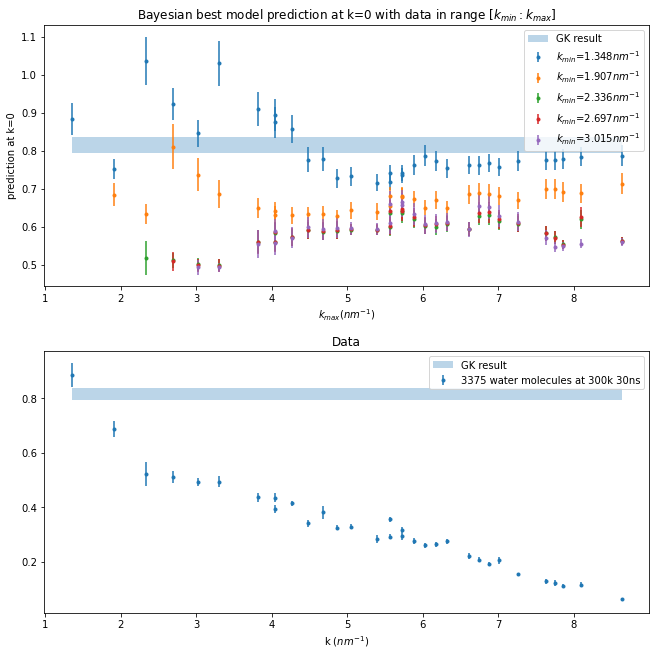

In [34]:
%matplotlib inline
fig, ax=plt.subplots(2,constrained_layout=True, figsize=[9,9])


ax[0].set_title('Bayesian best model prediction at k=0 with data in range $[k_{min}: k_{max}]$')
L=[0,[0,4],[0,4,6], [0,4,6,8], [0,4,6,8,10]]
for i in range(N_min):
    
    ax[0].errorbar(np.array(Npointsbl[i])*0.13484487571168569*10, np.array(predbl[i]), np.sqrt(np.array(spredbl[i])), fmt='.', label=r'$k_{min}$'+'={:.3f}'.format(np.linalg.norm(gplot[i,:])*0.13484487571168569*10)+'$ nm^{-1}$')
ax[0].fill_between(np.array(Npointsbl[0])*0.13484487571168569*10, np.ones(len(Npointsbl[0]))*0.816-np.ones(len(Npointsbl[0]))*0.021, np.ones(len(Npointsbl[0]))*0.816+np.ones(len(Npointsbl[0]))*0.021, label='GK result', alpha=0.3)    
ax[0].set_xlabel('$k_{max} (nm^{-1})$')
ax[0].set_ylabel('prediction at k=0')
ax[0].legend()
ax[1].set_title('Data')

ax[1].errorbar(np.linalg.norm(gplot, axis=1)*0.13484487571168569*10, dataplot1,datasigmaplot1, fmt='.', label='3375 water molecules at 300k 30ns') 
ax[1].fill_between(np.linalg.norm(gplot, axis=1)*0.13484487571168569*10, np.ones(len(gplot))*0.816-np.ones(len(gplot))*0.021, np.ones(len(gplot))*0.816+np.ones(len(gplot))*0.021, label='GK result', alpha=0.3)    
ax[1].legend()

ax[1].set_xlabel(r'k ($nm^{-1}$)')

Text(0.5, 0, 'k ($nm^{-1}$)')

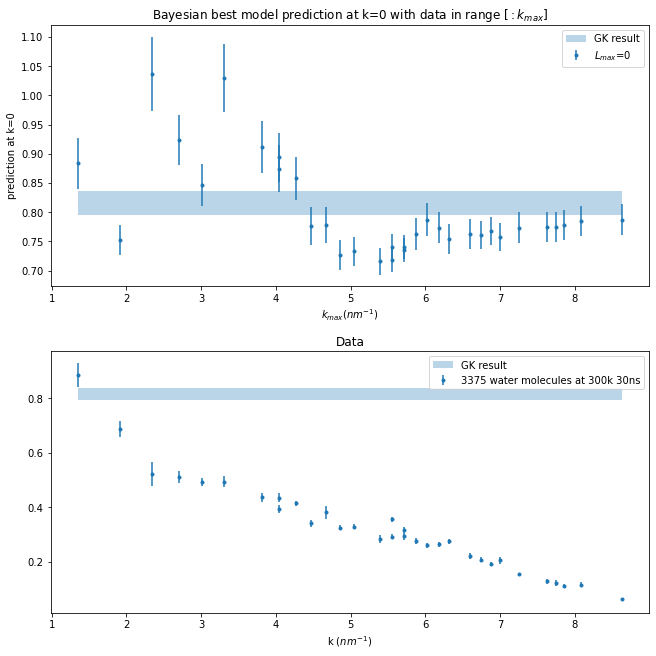

In [35]:
%matplotlib inline
fig, ax=plt.subplots(2,constrained_layout=True, figsize=[9,9])


ax[0].set_title('Bayesian best model prediction at k=0 with data in range $[: k_{max}]$')
L=[0,[0,4],[0,4,6], [0,4,6,8], [0,4,6,8,10]]
for i in range(1):
    
    ax[0].errorbar(np.array(Npointsbl[i])*0.13484487571168569*10, np.array(predbl[i]), np.sqrt(np.array(spredbl[i])), fmt='.', label=r'$L_{max}$'+'={}'.format(L[i]))
ax[0].fill_between(np.array(Npointsbl[0])*0.13484487571168569*10, np.ones(len(Npointsbl[0]))*0.816-np.ones(len(Npointsbl[0]))*0.021, np.ones(len(Npointsbl[0]))*0.816+np.ones(len(Npointsbl[0]))*0.021, label='GK result', alpha=0.3)    
ax[0].set_xlabel('$k_{max} (nm^{-1})$')
ax[0].set_ylabel('prediction at k=0')
ax[0].legend()
ax[1].set_title('Data')

ax[1].errorbar(np.linalg.norm(gplot, axis=1)*0.13484487571168569*10, dataplot1,datasigmaplot1, fmt='.', label='3375 water molecules at 300k 30ns') 
ax[1].fill_between(np.linalg.norm(gplot, axis=1)*0.13484487571168569*10, np.ones(len(gplot))*0.816-np.ones(len(gplot))*0.021, np.ones(len(gplot))*0.816+np.ones(len(gplot))*0.021, label='GK result', alpha=0.3)    
ax[1].legend()

ax[1].set_xlabel(r'k ($nm^{-1}$)')